# Hands on !

In [ ]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from pathlib import Path

# ? loading our data
sales = pd.read_csv('data/sales_data.csv',parse_dates=['Date'])

# ? the data a glance
# * he head() function in pandas is used to display the first few rows of a DataFrame or Series. 
# * By default, it shows the first 5 rows, but you can specify the number of rows to display.
sales.head(3)

In [ ]:
#
# * shape tell us how many rows an how many columns we have 
sales.shape

In [ ]:
#
# * The .info() function in pandas provides a concise summary of a DataFrame, which includes the index dtype and column dtypes, non-null values, and memory usage. 
# * This function is particularly useful for getting a quick overview of a DataFrame's structure and identifying any missing data.
sales.info()

In [ ]:
#
# * describe() for all those numerics fields, I can have an idea of the statistical properties of those
sales.describe()

#  Numerical analysis and visualization
we'll analyze Unit_cost colum

In [ ]:
# 
# * describe() a column not entire data like avobe
sales['Unit_Cost'].describe()

In [ ]:
# 
# * function in pandas is used to calculate the mean (average) of the values for each column or row in a DataFrame. 
# * It works with numerical data and excludes NaN values by default.
sales['Unit_Cost'].mean()

In [ ]:
#
# * function in pandas is used to calculate the median (the middle value) of the values for each column or row in a DataFrame. 
# * The median is a measure of central tendency that represents the middle value in a sorted list of numbers. 
# * This function excludes NaN values by default
sales['Unit_Cost'].median()

In [ ]:
# 
# * The .plot() function in pandas is used to create visualizations directly from a DataFrame or Series.
# * kind: (str, default 'line') - The type of plot to produce: 'line', 'bar', 'barh' (horizontal bar), 'hist' (histogram), 'box', 
# * 'kde' (Kernel Density Estimate), 'density', 'area', 'pie', 'scatter', 'hexbin'.
# * figsize: (tuple, optional) - The size of the figure (width, height).
# * df.plot(kind='plot_type', **kwargs)
sales['Unit_Cost'].plot(kind = 'box', vert =False, figsize=(10,5))
# * the graph shows whiskers that mean that shows us the first and third quartil the median

Text(0.5, 0, 'Unit_Cost')

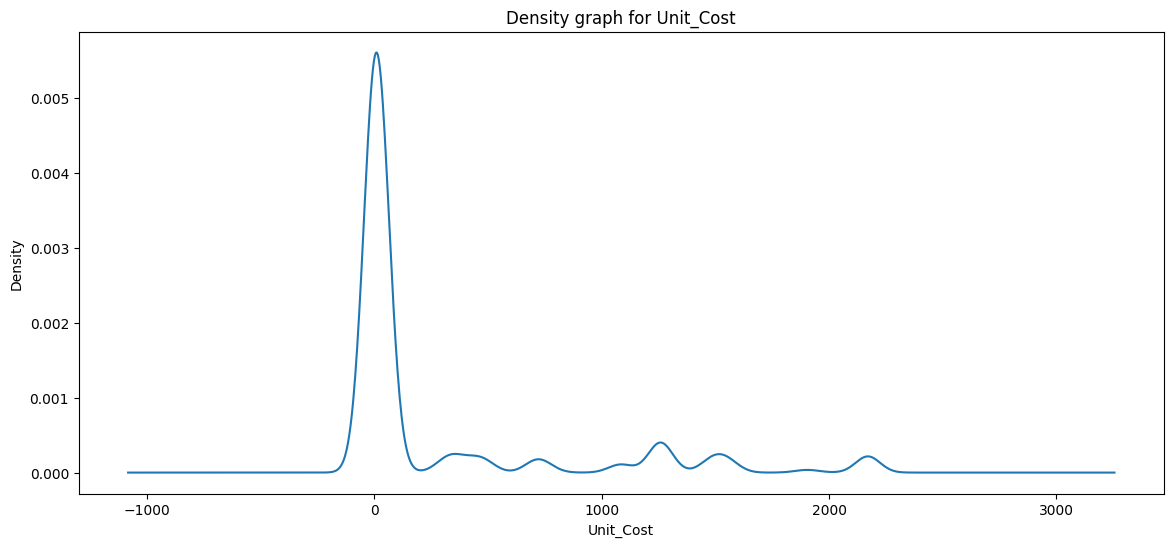

In [5]:
# 
# * pip install scipy
sales['Unit_Cost'].plot(kind = 'density', figsize=(14,6))
plt.title('Density graph for Unit_Cost')
plt.xlabel('Unit_Cost')

In [ ]:
# * distribution chart
ax = sales['Unit_Cost'].plot(kind = 'density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(),color='red')
ax.axvline(sales['Unit_Cost'].median(),color='green')

In [ ]:
sales['Unit_Cost'].plot(kind='hist', bins=20, figsize=(14,6))

In [ ]:
#
# * histogram of the costs of our products
ax = sales['Unit_Cost'].plot(kind = 'hist', figsize=(14,6))
ax.set_ylabel('Number of sales')
ax.set_xlabel('dollars')

# Categorical analysis and visualization
We'll analyze the Age_Group column

In [ ]:
# 
# * function in pandas is used to count the unique values in a Series (or a DataFrame column) and return a Series containing counts of unique values in descending order. 
# * This is useful for understanding the distribution of categorical data and quickly identifying the most or least common values.
sales['Age_Group'].value_counts()

In [ ]:
sales['Age_Group'].value_counts().plot(kind = 'pie', figsize=(6,6))

In [ ]:
ax = sales['Age_Group'].value_counts().plot(kind = 'bar', figsize=(14,6))
ax.set_ylabel('Number of sales')

# Relationship between the columns ?
Can we find any significant relationship ?

In [ ]:
# 
# * The .corr() function in pandas computes the pairwise correlation of columns in a DataFrame, excluding NaN values. 
# * Correlation measures the strength and direction of a linear relationship between two variables. 
# * The resulting output is a DataFrame that represents the correlation matrix.
# * DataFrame.corr(method='pearson', min_periods=1, numeric_only=_NoDefault.no_default)
corr = sales.corr(numeric_only=True)
corr

In [ ]:
#
# * matrix  correlation
fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)),corr.columns)

In [ ]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

In [ ]:
ax = sales[['Profit','Age_Group']].boxplot(by='Age_Group', figsize=(6,6))
ax.set_xlabel('Profit')

In [ ]:
# 
boxplot_cols = ['Year','Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))